In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import time
import seaborn as sn
from sklearn import *
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [2]:
dataPi = pd.read_csv('trainset/trainset.csv')

On doit utiliser le dataset train pour tester les résultats étant donné que dans le dataset test il n'y a pas les labels.

In [3]:
X_dataPi = dataPi[dataPi.columns[1:-1]]
y_dataPi = dataPi[dataPi.columns[-1]]

X_dataPiTrain, X_dataPiTest, y_dataPiTrain, y_dataPiTest = model_selection.train_test_split(X_dataPi, y_dataPi, train_size=0.75, test_size=0.25)

On va déjà essayer avec un knn juste pour voir:

In [4]:
knnModels = []
KnnResultsTest = []
#knnClassificationTime = []
KnnResultsTrain = []
for k in range (1,10):
    knnModels.append(KNeighborsClassifier(n_neighbors=k, algorithm='brute'))
    knnModels[k-1].fit(X_dataPiTrain,y_dataPiTrain)
    
    #start_time=time.time()
    knnModels[k-1].predict(X_dataPiTest)
    #knnClassificationTime.append(time.time() - start_time)
    
    KnnResultsTest.append(knnModels[k-1].score(X_dataPiTest,y_dataPiTest))
    KnnResultsTrain.append(knnModels[k-1].score(X_dataPiTrain,y_dataPiTrain))

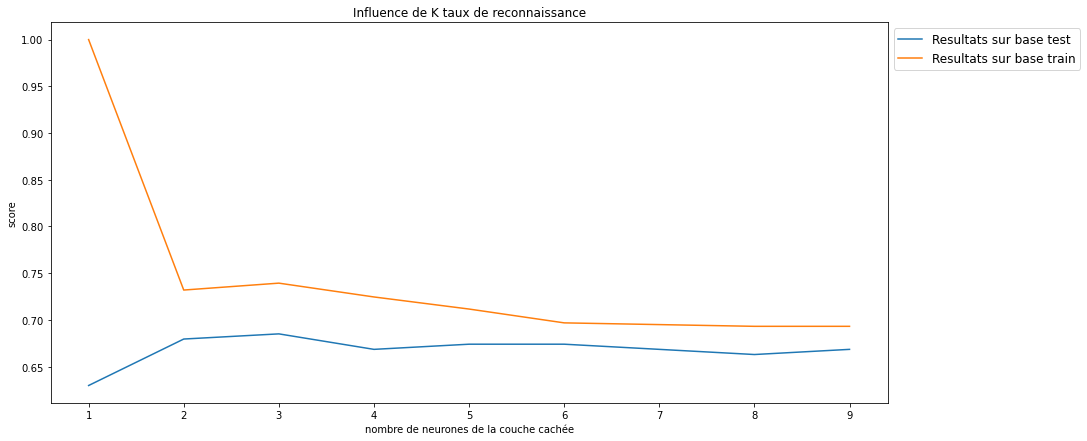

In [5]:
plt.figure(figsize=(15,7))
plt.title("Influence de K taux de reconnaissance")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.plot(range(1,10),KnnResultsTest,label="Resultats sur base test")
plt.plot(range(1,10) ,KnnResultsTrain,label="Resultats sur base train")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');

## Interprétation naïve : notre classifieur semble déjà avoir un taux de reconnaissance qui est intéressant avec environ 70% de réussite pour un K = 3 sans aucun prétraitement des données.

## Vérifions la matrice de confusion:

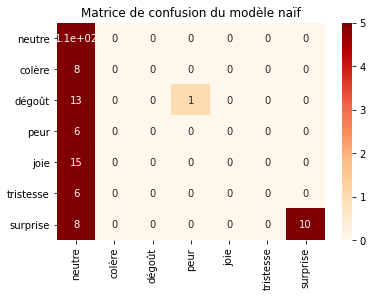

In [6]:
emotions = {0:"neutre", 1:"colère", 3:"dégoût", 4:"peur", 5:"joie", 6:"tristesse", 7:"surprise"}
yPredicted=knnModels[2].predict(X_dataPiTest)
matriceConfusion = metrics.confusion_matrix(y_dataPiTest,yPredicted)
sn.heatmap(matriceConfusion, annot=True,cmap="OrRd",vmax = 5,xticklabels = emotions.values(),yticklabels = emotions.values());
plt.title("Matrice de confusion du modèle naïf");

In [7]:
print ("La précision du modèles pour les classes différentes de 'neutre' est de :")
print(sum(y_dataPiTest[yPredicted == y_dataPiTest] != 0) / sum(y_dataPiTest != 0))
print ("Nous pouvons aussi utiliser la fonction balanced accuracy de sickitlearn qui nous donne une précision de:")
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_dataPiTest, yPredicted))

La précision du modèles pour les classes différentes de 'neutre' est de :
0.14925373134328357
Nous pouvons aussi utiliser la fonction balanced accuracy de sickitlearn qui nous donne une précision de:
0.22222222222222224


In [8]:
print(classification_report(y_dataPiTest,yPredicted,zero_division=0))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       114
           1       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         6
           7       1.00      0.56      0.71        18

    accuracy                           0.69       181
   macro avg       0.24      0.22      0.22       181
weighted avg       0.52      0.69      0.58       181



## Nous en déduisons que le résultat est bien plus catastrophique que ce que l'on aurait pu croire. En effet le modèle a tendance à classer quasiment tous les éléments en neutre. Nous remarquons que le taux de précision est très mauvaise


## Mais pourquoi? Commençons par étudier la répartission des données:

In [9]:
print("Il y a ", dataPi.shape[0] , "exemples en tout dans le dataset dont :")
[print ( dataPi[dataPi['label'] == a].shape[0], "exemples d'images de classe",a,"(",emotions[a],")") for a in np.sort(dataPi['label'].unique())];

Il y a  722 exemples en tout dans le dataset dont :
473 exemples d'images de classe 0 ( neutre )
34 exemples d'images de classe 1 ( colère )
50 exemples d'images de classe 3 ( dégoût )
17 exemples d'images de classe 4 ( peur )
55 exemples d'images de classe 5 ( joie )
23 exemples d'images de classe 6 ( tristesse )
70 exemples d'images de classe 7 ( surprise )


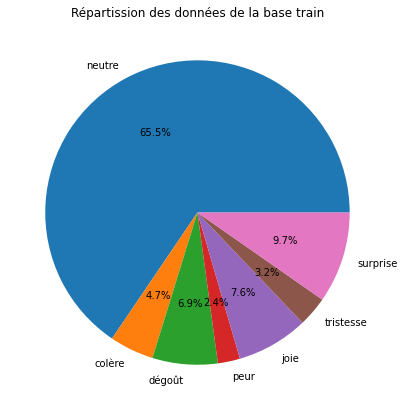

In [10]:
plt.figure(figsize=(7,7))
plt.title("Répartission des données de la base train")
plt.pie([ dataPi[dataPi['label'] == a].shape[0] for a in np.sort(dataPi['label'].unique())], autopct='%1.1f%%',labels=emotions.values());

### Comme nous le voyons ici les classes de notre base de test ont des données très inégalement réparties. Comment faire pour résoudre ce problème? Nous devons effectuer des recherches.

# Apprentissage déséquilibré ou  imbalenced learning


### Bibliographie:

### <i> Machine Learning from Imbalanced Data Sets 101</i>, Foster Provost, NY University
#### https://www.aaai.org/Papers/Workshops/2000/WS-00-05/WS00-05-001.pdf

### <i>Learning from imbalanced data: open challenges and future directions</i>, Bartosz Krawczyk, Wrocław University of Technology
#### https://link.springer.com/article/10.1007/s13748-016-0094-0?TB_iframe=true&error=cookies_not_supported&code=a3e33168-782e-41e5-8585-e731754069d2

### <i>Imbalenced Learning</i>, Haibo He & Yunqian Ma
#### https://books.google.fr/books?hl=fr&lr=&id=CVHx-Gp9jzUC&oi=fnd&pg=PT9&dq=machine+learning+imbalanced+data&ots=2iLmIhzp5g&sig=vMMBD-6KVEKXxjOeFA8pPd6B3rI#v=onepage&q=machine%20learning%20imbalanced%20data&f=false

https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/

### Ajinkya More | Resampling techniques and other strategies
#### https://www.youtube.com/watch?v=-Z1PaqYKC1w

In [11]:
''' 
clfArray = []
clfResultsTrain = []
clfResultsTest = []
i = 0;
for numNeuroneCache in [int(1.4**x) for x in range(2,20)]:
    localClfArray = []
    localClfResultsTest = []
    localClfResultsTrain = []
    for iterateur in range (3): 
        print("Entrainement, avec C=", numNeuroneCache)
        #print("Itération numéro : ", iterateur)
        localClfArray.append(MLPClassifier(hidden_layer_sizes=numNeuroneCache,max_iter=500, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0))
        localClfArray[iterateur].fit(X_dataPiTrain,y_dataPiTrain)
        localClfResultsTest.append(localClfArray[iterateur].score(X_dataPiTest,y_dataPiTest))
        localClfResultsTrain.append(localClfArray[iterateur].score(X_dataPiTrain,y_dataPiTrain))
    clfArray.append(localClfArray)
    clfResultsTest.append(localClfResultsTest)
    clfResultsTrain.append(localClfResultsTrain)
    i += 1
'''

' \nclfArray = []\nclfResultsTrain = []\nclfResultsTest = []\ni = 0;\nfor numNeuroneCache in [int(1.4**x) for x in range(2,20)]:\n    localClfArray = []\n    localClfResultsTest = []\n    localClfResultsTrain = []\n    for iterateur in range (3): \n        print("Entrainement, avec C=", numNeuroneCache)\n        #print("Itération numéro : ", iterateur)\n        localClfArray.append(MLPClassifier(hidden_layer_sizes=numNeuroneCache,max_iter=500, activation=\'tanh\', solver=\'sgd\', batch_size=1, alpha=0, learning_rate=\'adaptive\', verbose=0))\n        localClfArray[iterateur].fit(X_dataPiTrain,y_dataPiTrain)\n        localClfResultsTest.append(localClfArray[iterateur].score(X_dataPiTest,y_dataPiTest))\n        localClfResultsTrain.append(localClfArray[iterateur].score(X_dataPiTrain,y_dataPiTrain))\n    clfArray.append(localClfArray)\n    clfResultsTest.append(localClfResultsTest)\n    clfResultsTrain.append(localClfResultsTrain)\n    i += 1\n'

# Arbre de décision

## Nous utilisons le paramètre class_weight = balanced afin de chercher à améliorer le score des classes minoritaires.

In [12]:
from sklearn.tree import DecisionTreeClassifier
TreesArray = []
TreesResultsTrain = []
TreesResultsTest = []
TreesBalancedResultsTrain = []
TreesBalancedResultsTest = []

for max_depth in [int(1.4**x) for x in range(2,15)]:
    localTreesArray = []
    localTreesResultsTest = []
    localTreesResultsTrain = []
    localTreesBalancedResultsTest = []
    localTreesBalancedResultsTrain = []
    for iterateur in range (10): 
        #print("Entrainement, avec max_depth=", max_depth)
        #print("Itération numéro : ", iterateur)
        localTreesArray.append(DecisionTreeClassifier(max_depth=max_depth,class_weight='balanced'))
        localTreesArray[iterateur].fit(X_dataPiTrain,y_dataPiTrain)
        localTreesResultsTest.append(localTreesArray[iterateur].score(X_dataPiTest,y_dataPiTest))
        localTreesResultsTrain.append(localTreesArray[iterateur].score(X_dataPiTrain,y_dataPiTrain))
        localTreesBalancedResultsTest.append(balanced_accuracy_score(y_dataPiTest, localTreesArray[iterateur].predict(X_dataPiTest)))
        localTreesBalancedResultsTrain.append(balanced_accuracy_score(y_dataPiTrain, localTreesArray[iterateur].predict(X_dataPiTrain)))
    TreesArray.append(localTreesArray)
    TreesResultsTest.append(localTreesResultsTest)
    TreesResultsTrain.append(localTreesResultsTrain)
    TreesBalancedResultsTest.append(localTreesBalancedResultsTest)
    TreesBalancedResultsTrain.append(localTreesBalancedResultsTrain)

## Ici nous allons traçer une figure qui prendra en compte la métrique de score habituelle ainsi que la métrique Balanced

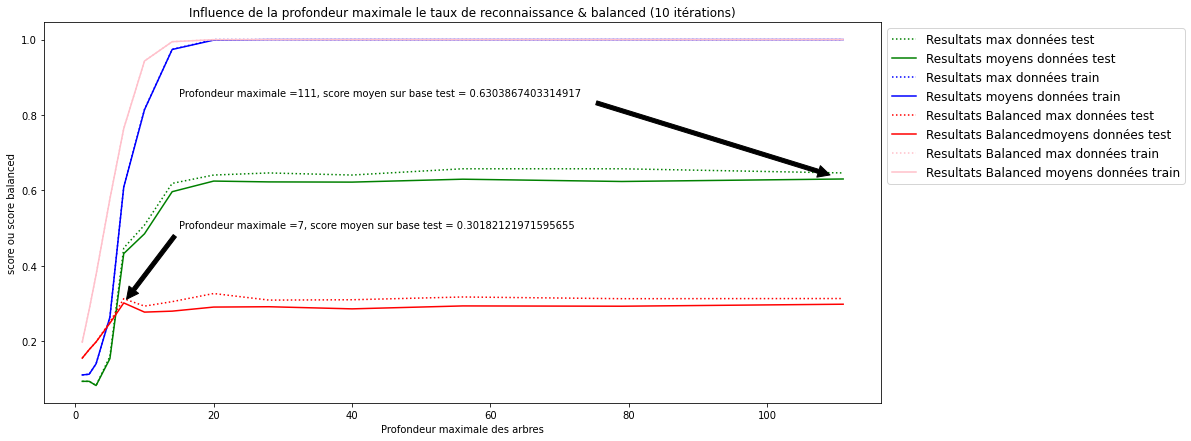

In [13]:
plt.figure(figsize=(15,7))
plt.title("Influence de la profondeur maximale le taux de reconnaissance & balanced (10 itérations)")
plt.ylabel('score ou score balanced')
plt.xlabel('Profondeur maximale des arbres')
plt.annotate('Profondeur maximale ='+ str(int(1.4**([np.mean(result) for result in TreesResultsTest].index(max([np.mean(result) for result in TreesResultsTest]))+2)))+', score moyen sur base test = ' + str(max([np.mean(result) for result in TreesResultsTest])), xy= (int(1.4**([np.mean(result) for result in TreesResultsTest].index(max([np.mean(result) for result in TreesResultsTest]))+2)),max([np.mean(result) for result in TreesResultsTest])), xytext=( 15,0.85) ,arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Profondeur maximale ='+ str(int(1.4**([np.mean(result) for result in TreesBalancedResultsTest].index(max([np.mean(result) for result in TreesBalancedResultsTest]))+2)))+', score moyen sur base test = ' + str(max([np.mean(result) for result in TreesBalancedResultsTest])), xy= (int(1.4**([np.mean(result) for result in TreesBalancedResultsTest].index(max([np.mean(result) for result in TreesBalancedResultsTest]))+2)),max([np.mean(result) for result in TreesBalancedResultsTest])), xytext=( 15,0.5) ,arrowprops=dict(facecolor='black', shrink=0.05),)
plt.plot([int(1.4**x) for x in range(2,15)],[max(result) for result in TreesResultsTest],label ="Resultats max données test", color="green", linestyle =':')
plt.plot([int(1.4**x) for x in range(2,15)],[np.mean(result) for result in TreesResultsTest],label ="Resultats moyens données test", color="green")

plt.plot([int(1.4**x) for x in range(2,15)],[max(result) for result in TreesResultsTrain],label ="Resultats max données train",color="blue", linestyle =':')
plt.plot([int(1.4**x) for x in range(2,15)],[np.mean(result) for result in TreesResultsTrain],label ="Resultats moyens données train",color="blue")

plt.plot([int(1.4**x) for x in range(2,15)],[max(result) for result in TreesBalancedResultsTest],label ="Resultats Balanced max données test",color="red", linestyle =':')
plt.plot([int(1.4**x) for x in range(2,15)],[np.mean(result) for result in TreesBalancedResultsTest],label ="Resultats Balancedmoyens données test",color="red")

plt.plot([int(1.4**x) for x in range(2,15)],[max(result) for result in TreesBalancedResultsTrain],label ="Resultats Balanced max données train",color="pink", linestyle =':')
plt.plot([int(1.4**x) for x in range(2,15)],[np.mean(result) for result in TreesBalancedResultsTrain],label ="Resultats Balanced moyens données train",color="pink")


#plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');

In [14]:
bestTree = DecisionTreeClassifier(max_depth=7,class_weight='balanced').fit(X_dataPiTrain,y_dataPiTrain)
print(classification_report(y_dataPiTest,bestTree.predict(X_dataPiTest),zero_division=0))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       114
           1       0.00      0.00      0.00         8
           3       0.09      0.29      0.14        14
           4       0.00      0.00      0.00         6
           5       0.44      0.27      0.33        15
           6       0.11      0.17      0.13         6
           7       0.70      0.89      0.78        18

    accuracy                           0.43       181
   macro avg       0.30      0.29      0.28       181
weighted avg       0.58      0.43      0.48       181



In [15]:
arrayScores = []
for i in range (10):
    arbre = DecisionTreeClassifier(class_weight='balanced').fit(X_dataPiTrain,y_dataPiTrain)
    arrayScores.append(balanced_accuracy_score(y_dataPiTest, arbre.predict(X_dataPiTest)))
print ("Le score balanced optenu par un modèle d'arbre sans limite de profondeur est de: ", np.mean(arrayScores))


Le score balanced optenu par un modèle d'arbre sans limite de profondeur est de:  0.28395512591001315


## Le score balanced d'environ 32% constitue déjà une grande amélioration par rapport aux 15% du MLP.

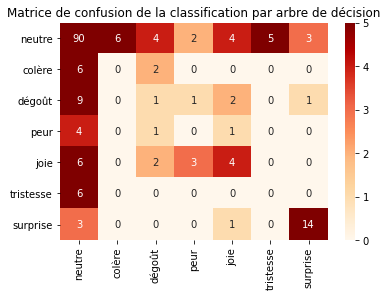

In [16]:
matriceConfusion =metrics.confusion_matrix(y_dataPiTest, arbre.predict(X_dataPiTest))
sn.heatmap(matriceConfusion, annot=True,cmap="OrRd",vmax = 5,xticklabels = emotions.values(),yticklabels = emotions.values());
plt.title("Matrice de confusion de la classification par arbre de décision");

# Forêt

In [17]:
from sklearn.ensemble import RandomForestClassifier
arrayScores = []
for i in range (10):
    arbre = RandomForestClassifier(n_estimators=25,class_weight='balanced').fit(X_dataPiTrain,y_dataPiTrain)
    arrayScores.append(balanced_accuracy_score(y_dataPiTest, arbre.predict(X_dataPiTest)))
print ("Le score moyen optenu par un modèle d'arbre sans limite de profondeur est de: ", np.mean(arrayScores))

Le score moyen optenu par un modèle d'arbre sans limite de profondeur est de:  0.2553717627401838


### Après plusieurs essais avec les forêts je ne trouve rien de concluant, l'arbre semble faire mieux à chaque fois.

In [18]:
from sklearn.svm import SVC
arrayScores = []
for i in range (10):
    mdl = SVC(C=100,gamma='auto',class_weight='balanced').fit(X_dataPiTrain,y_dataPiTrain)
    arrayScores.append(balanced_accuracy_score(y_dataPiTest, mdl.predict(X_dataPiTest)))
print ("Le score moyen optenu par un modèle d'arbre sans limite de profondeur est de: ", np.mean(arrayScores))

Le score moyen optenu par un modèle d'arbre sans limite de profondeur est de:  0.14285714285714285


In [19]:
metrics.confusion_matrix(y_dataPiTest, mdl.predict(X_dataPiTest))

array([[114,   0,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0,   0],
       [ 14,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0],
       [ 15,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0],
       [ 18,   0,   0,   0,   0,   0,   0]], dtype=int64)

## SVC semble tout classer en neutre

# Nous allons simporter la bibliotèhèque 
# !pip install imbalanced-learn



In [20]:
from imblearn.over_sampling import SMOTE

## Méthodes pour équilibrer la classification, => avoir un recall maximal pour les classes monoritaires tout en essayant de garder une grande précision pour la classe majoritaire

# Méthodes avec la bibliothèque imblearn

#### https://imbalanced-learn.org/stable/under_sampling.html#

## I) weighted classes
## II) Undersampling
- ### naïve random undersampling
- ### Near miss v1
- ### Near miss v2
- ### Near miss v3
- ### Condensed Nearest Neighbour

## III) Oversampling
## IV) combination
## V) autre


![title](grid_search_workflow.png)
## source : https://scikit-learn.org/stable/modules/cross_validation.html

# Fonction qui renvoit un résumé de la performance des différentes méthodes de resampling des données en fonction d'un modèle.

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek



def rapportDeResampling(X_train, y_train,X_test,y_test, model, targetLabels = None):

    
    #Si il n'y a pas de labels fournis, on les récupère directement sur les données:
    nbClass = len([a for a in np.sort(y_train.unique())])
    if targetLabels  == None:
        targetLabels = [a for a in np.sort(y_train.unique())]
    
    ResamplingMethods = [RandomUnderSampler(),NearMiss(version=1),NearMiss(version=2),NearMiss(version=3),CondensedNearestNeighbour(),EditedNearestNeighbours(),RepeatedEditedNearestNeighbours(),RandomOverSampler(),SMOTE(),ADASYN(),SMOTEENN(),SMOTETomek()]
    
    
    
    ResamplingMethodsDicArray = [
        {
            
            "name": "Random Under Sampler",
            "family": "Under sampling",
            "method": RandomUnderSampler()

        },
        {
            "name": "Near Miss V1",
            "family": "Under sampling",
            "method": NearMiss(version=1)
        },
        {
            "name": "Near Miss V2",
            "family": "Under sampling",
            "method": NearMiss(version=2)
        },
        {
            "name": "Near Miss V3",
            "family": "Under sampling",
            "method": NearMiss(version=3)
        },
        {
            "name": "Condensed Nearest Neighbour",
            "family": "Under sampling",
            "method": CondensedNearestNeighbour()
        },
        {
            "name": "Edited Nearest Neighbours",
            "family": "Under sampling",
            "method": EditedNearestNeighbours()
        },
        {
            "name": "Repeated Edited Nearest Neighbours",
            "family": "Under sampling",
            "method": RepeatedEditedNearestNeighbours()
        },
        {
            "name": "Random Over Sampler",
            "family": "Over sampling",
            "method": RandomOverSampler()
        },
        {
            "name": "SMOTE",
            "family": "Over sampling",
            "method": SMOTE()
        },
        {
            "name": "ADASYN",
            "family": "Over sampling",
            "method": ADASYN()
        },
        {
            "name": "SMOTEENN",
            "family": "Combined",
            "method": SMOTEENN()
        },
        {
            "name": "SMOTETomek",
            "family": "Combined",
            "method": SMOTETomek()
        }    
    ]
 
    
    lines = ((len(ResamplingMethodsDicArray)+1)//2) + (len(ResamplingMethodsDicArray)+1)%2

    xyPlot = range(2,(len(ResamplingMethodsDicArray)+1) + 1)
    
    fig = plt.figure(1,figsize=(15,20))

    ax = fig.add_subplot(lines,2,1)
    
        
    model.fit(X_train, y_train)
    clr = classification_report(y_test,model.predict(X_test),zero_division=0,output_dict=True)
 
    ax.set_title( "Répartission initiale des données de la base"+"\n"+"score global="+ str(model.score(X_test,y_test))+"\n"+"précision globale="+ str(clr['weighted avg']['precision'])+"\n"+"précision moyenne des classes="+ str(clr['macro avg']['precision'])+"\n"+"Rappel moyen des classes="+ str(clr['macro avg']['recall']))

    ax.pie([ y_train[y_train == a].shape[0] for a in np.sort(y_train.unique())], autopct='%1.1f%%',labels=targetLabels)
    for p in range(len(ResamplingMethodsDicArray)):
        
        X_resampled, y_resampled = ResamplingMethodsDicArray[p]["method"].fit_resample(X_train,y_train)   
            #certaines méthodes peuvent enlever tous les exemples d'une calsse il faut donc revoir le label
        if len([a for a in np.sort(y_resampled.unique())])  != nbClass:
            LocalTargetLabel = [a for a in np.sort(y_resampled.unique())]
        else:
            LocalTargetLabel = targetLabels
           
        
        model.fit(X_resampled, y_resampled)
        clr = classification_report(y_test,model.predict(X_test),zero_division=0,output_dict=True)
        
        ResamplingMethodsDicArray[p]['GlobalAccuracy'] = model.score(X_test,y_test)
        ResamplingMethodsDicArray[p]['GlobalPrecision'] = clr['weighted avg']['precision']
        ResamplingMethodsDicArray[p]['MeanClassPrecision'] = clr['macro avg']['precision']
        ResamplingMethodsDicArray[p]['MeanClassRecall'] = clr['macro avg']['recall']
        
        ax = fig.add_subplot(lines,2,xyPlot[p])
        ax.set_title( ResamplingMethodsDicArray[p]["name"]+ ", méthode de type: "+ ResamplingMethodsDicArray[p]["family"]+"\n"+"score global="+ str(ResamplingMethodsDicArray[p]['GlobalAccuracy'])+"\n"+"précision globale="+ str(ResamplingMethodsDicArray[p]['GlobalPrecision'])+"\n"+"précision moyenne des classes="+ str(ResamplingMethodsDicArray[p]['MeanClassPrecision'])+"\n"+"Rappel moyen des classes="+ str(ResamplingMethodsDicArray[p]['MeanClassRecall']))
        
        ax.pie([ y_resampled[y_resampled == a].shape[0] for a in np.sort(y_resampled.unique())], autopct='%1.1f%%',labels=LocalTargetLabel)
    plt.tight_layout(pad=2) 
    plt.show()

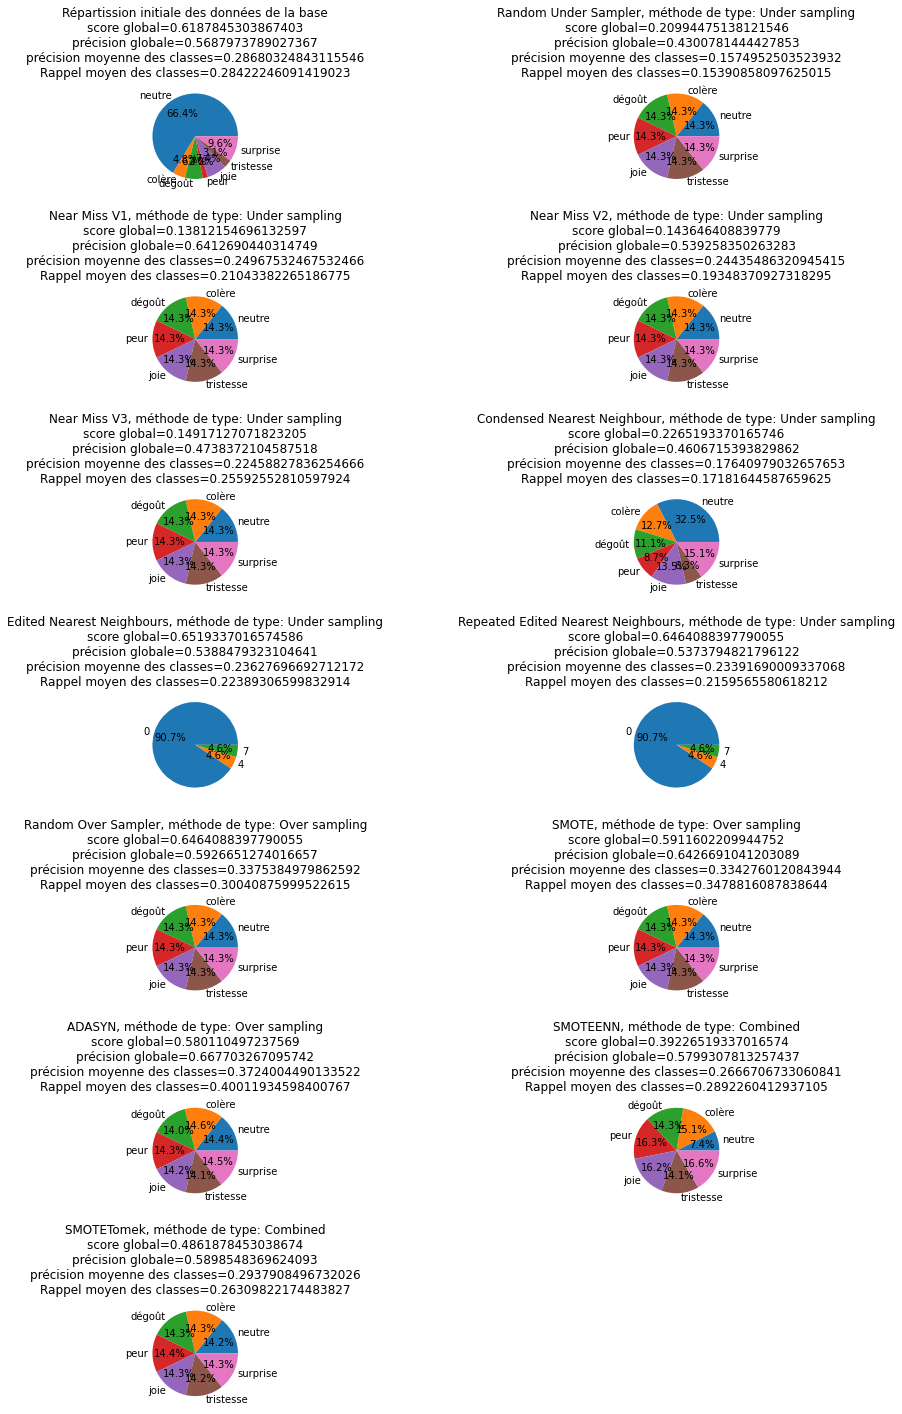

In [22]:
rapportDeResampling(X_dataPiTrain, y_dataPiTrain,X_dataPiTest, y_dataPiTest,DecisionTreeClassifier(class_weight='balanced'),emotions.values() )

In [23]:
import math

def dist(point1, point2, df):
    point1, point2 = str(point1), str(point2)
    return  (  (df[' x_' + point2] - df[' x_' + point1])**(2) +  (df[' y_' + point2] - df[' y_' + point1])**(2)   )**(0.5)


In [32]:
X_AC = X_dataPiTrain.copy()
for i in range(0,68):
    for j in range(i,68): # afin de ne pas recalculer deux fois la meme distance
        if (i != j): # on ne calcule pas la distance d'un point avec lui même
            X_AC['dist'+str(i)+"_"+str(j)]  = dist(i, j, X_dataPiTrain)
            
X_AC.drop(X_AC.iloc[:, 0:136], inplace = True, axis = 1) 

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=100)
bestfeatures = bestfeatures.fit(X_AC,y_dataPiTrain)
dfscores = pd.DataFrame(bestfeatures.scores_)
dfcolumns = pd.DataFrame(X_AC.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values("Score",ascending=False, inplace = True) 
featureScores[0:20]

,Specs,Score
2266,dist62_66,122.475301
2262,dist61_67,120.051736
2269,dist63_65,119.752973
2156,dist51_66,50.483893
2170,dist52_65,45.436004
2227,dist57_62,44.152985
2141,dist50_67,43.017389
2235,dist58_61,42.705880
2218,dist56_63,41.714189
2261,dist61_66,35.388525


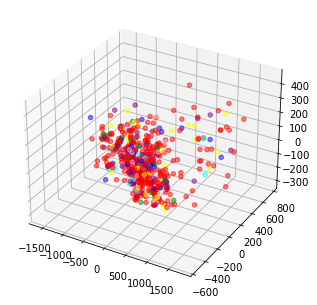

In [34]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pca.fit(X_AC)

XPCA = pca.transform(X_AC)

XPCADf = pd.DataFrame(data = XPCA, columns = ['pc1', 'pc2', 'pc3'])
colors = {0:'red', 1:'green', 3:'blue', 4:'pink',5:'yellow', 6:'cyan', 7:'purple'}
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter(XPCADf.pc1, XPCADf.pc2, XPCADf.pc3, c=y_dataPiTrain.map(colors),alpha=0.5);


In [35]:
X_AC

,dist0_1,dist0_2,dist0_3,dist0_4,dist0_5,dist0_6,dist0_7,dist0_8,dist0_9,dist0_10,...,dist63_64,dist63_65,dist63_66,dist63_67,dist64_65,dist64_66,dist64_67,dist65_66,dist65_67,dist66_67
118,32.715287,65.991893,100.753164,136.091513,171.326735,205.313248,233.964185,250.807695,260.480038,258.280158,...,23.865037,11.307077,19.375242,30.370545,22.078270,36.458470,49.912423,14.385062,27.858212,13.609188
661,29.233542,58.289279,87.101607,115.793350,143.197800,168.139228,191.306351,207.365113,217.755184,221.720049,...,20.324616,1.503330,10.673800,20.354115,20.406127,30.652895,40.527768,10.282509,20.124860,9.904544
630,29.620432,58.729635,86.733615,113.392151,137.524761,159.317356,181.370036,199.642280,215.745151,227.563288,...,25.977105,0.412311,12.249490,22.800000,25.849565,38.110628,48.741050,12.319903,22.903493,10.656923
55,25.543101,50.901179,75.644762,99.585792,121.653319,141.123386,158.398232,172.283081,184.288904,191.961897,...,19.293781,0.412311,8.558621,16.025293,19.436563,27.714617,35.214202,8.515868,15.953056,7.500667
416,30.810388,61.743016,92.747507,123.745707,154.812467,184.318339,213.801894,234.236462,247.445044,250.970616,...,23.530618,0.509902,12.800391,23.700844,24.035183,36.308126,47.220758,12.291867,23.200216,11.088733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,28.911071,57.600434,86.118523,113.194346,138.803242,161.857777,184.971619,204.062000,220.083461,231.870589,...,24.820153,0.860233,12.410077,23.000217,25.357050,37.203360,47.808472,11.960351,22.514218,10.607544
470,26.422907,53.350164,79.483646,103.991971,126.846364,147.168815,168.722168,188.002660,204.862124,217.629272,...,23.577108,1.414214,11.315918,21.413314,23.566926,34.358260,44.544921,10.929318,21.115160,10.200000
426,30.737111,62.692663,93.450308,123.838928,153.091901,181.117641,207.671977,227.041934,239.362173,244.861798,...,24.120738,6.888396,14.867750,24.270558,23.720034,36.652149,47.298731,12.943724,23.711811,10.901835
191,30.813147,61.468854,91.851728,121.678470,149.860101,176.042750,203.420476,225.937447,245.583815,258.845321,...,30.905825,3.178050,15.526107,28.996896,30.425811,45.556668,59.411194,15.185519,29.000000,13.870833


In [36]:
X_new_ft = X_dataPi.copy()
for i in range(0,68):
    for j in range(i,68): # afin de ne pas recalculer deux fois la meme distance
        if (i != j): # on ne calcule pas la distance d'un point avec lui même
            X_new_ft['dist'+str(i)+"_"+str(j)]  = dist(i, j, X_dataPi)
            
X_new_ft.drop(X_new_ft.iloc[:, 0:136], inplace = True, axis = 1) 

X_nf_train, X_nf_test, y_dataPiTrain, y_dataPiTest = model_selection.train_test_split(X_new_ft, y_dataPi, train_size=0.75, test_size=0.25,shuffle=False)

0.7790055248618785


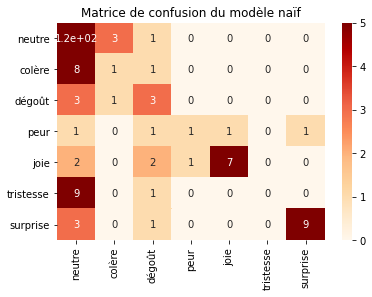

In [37]:
knnModels = []
KnnResultsTest = []
KnnResultsTrain = []

knnModel = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
knnModel.fit(X_nf_train,y_dataPiTrain)
print(knnModel.score(X_nf_test,y_dataPiTest))

yPredicted=knnModel.predict(X_nf_test)
matriceConfusion = metrics.confusion_matrix(y_dataPiTest,yPredicted)
sn.heatmap(matriceConfusion, annot=True,cmap="OrRd",vmax = 5,xticklabels = emotions.values(),yticklabels = emotions.values());
plt.title("Matrice de confusion du modèle naïf");

0.6850828729281768


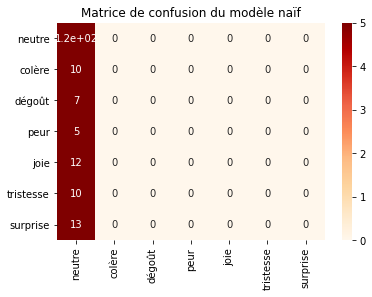

In [42]:
clf = MLPClassifier(hidden_layer_sizes=(20,20),max_iter=500, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0)
clf.fit(X_nf_train,y_dataPiTrain)
print(clf.score(X_nf_test,y_dataPiTest))
yPredicted=clf.predict(X_nf_test)
matriceConfusion = metrics.confusion_matrix(y_dataPiTest,yPredicted)
sn.heatmap(matriceConfusion, annot=True,cmap="OrRd",vmax = 5,xticklabels = emotions.values(),yticklabels = emotions.values());
plt.title("Matrice de confusion du modèle naïf");

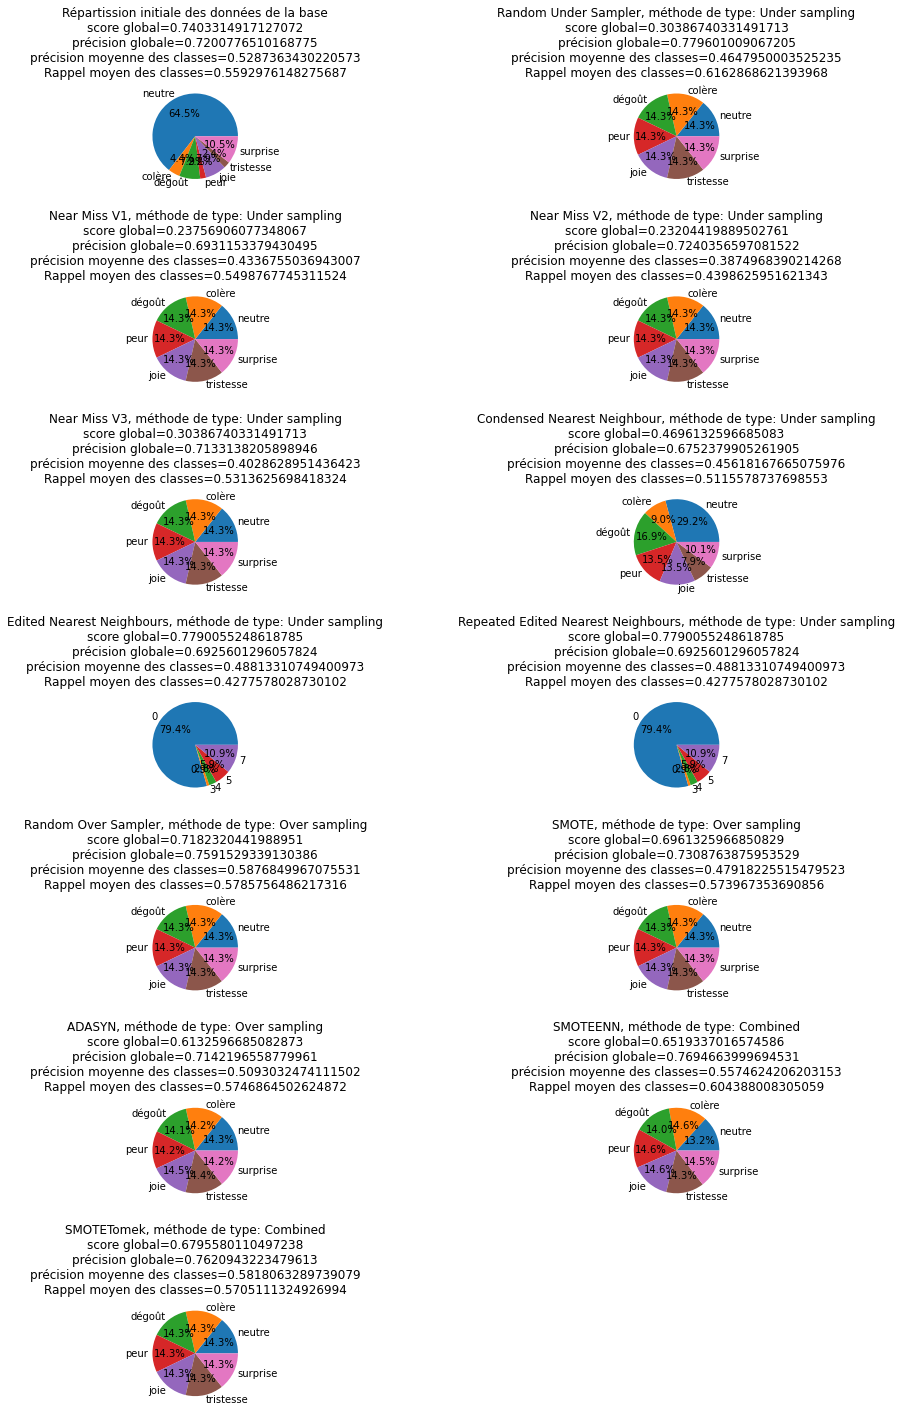

In [43]:
rapportDeResampling(X_nf_train, y_dataPiTrain,X_nf_test, y_dataPiTest,DecisionTreeClassifier(class_weight='balanced'),emotions.values() )